# **Time Series Model**

## **ARIMA**

*   This is not correct prediction
*   Did not do in correct format
*   why it is not correct because the data is in unstaionary and the p value is  greater than 0.5
*   And i did not do the difference in length to reslove it
*   I have resloved it and done below and given the predcitions



In [ ]:
pip install numpy==1.24.4 pandas==1.5.3 scipy==1.10.1 pmdarima==2.0.4


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('preprocessed_input.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
length_series = df.set_index('Date')['Length_cm']


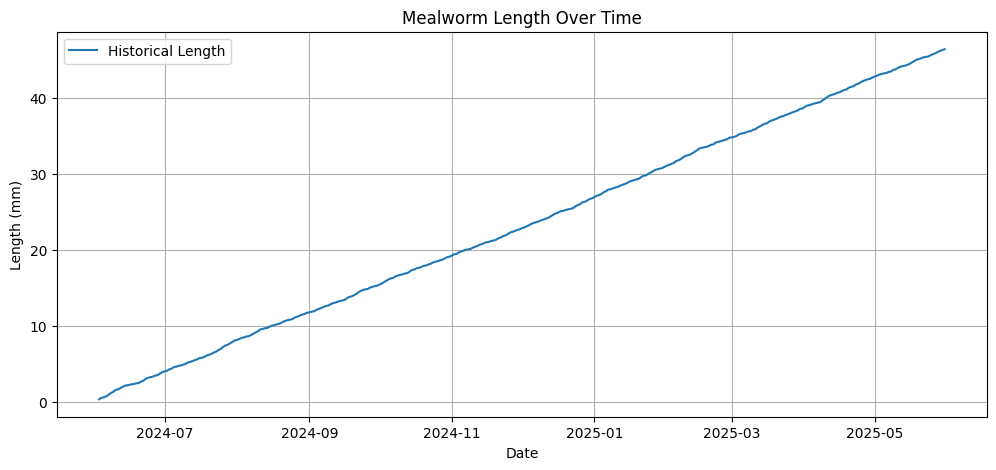

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(length_series, label='Historical Length')
plt.title("Mealworm Length Over Time")
plt.xlabel("Date")
plt.ylabel("Length (mm)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
from pmdarima import auto_arima

# Automatically select the best (p,d,q) parameters
model = auto_arima(length_series, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 550.814
Date:                Thu, 12 Jun 2025   AIC                          -1097.629
Time:                        06:24:41   BIC                          -1089.845
Sample:                    06-03-2024   HQIC                         -1094.534
                         - 05-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1269      0.003     42.832      0.000       0.121       0.133
sigma2         0.0028      0.000      9.774      0.000       0.002       0.003
Ljung-Box (L1) (Q):                   0.06   Jarque-

In [ ]:
# Forecast future 365 days
forecast = model.predict(n_periods=365)

# Generate future dates
future_dates = pd.date_range(start=length_series.index[-1] + pd.Timedelta(days=1), periods=365)

# Combine into a DataFrame
forecast_df = pd.DataFrame({
    'date': future_dates,
    'Predicted_Length_mm': forecast
})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


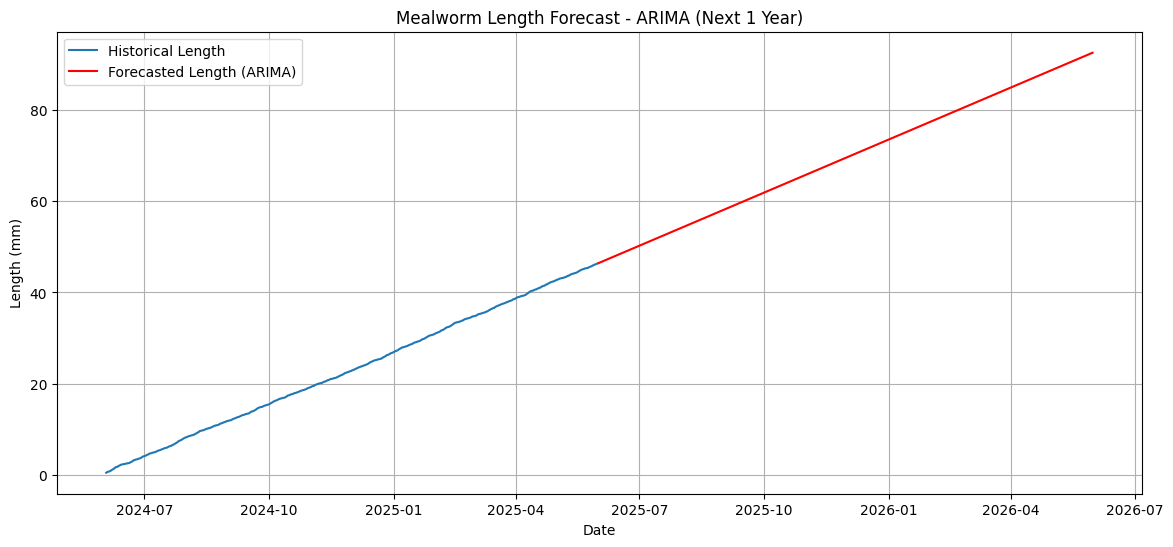

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(length_series.index, length_series.values, label='Historical Length')
plt.plot(forecast_df['date'], forecast_df['Predicted_Length_mm'], label='Forecasted Length (ARIMA)', color='red')
plt.title('Mealworm Length Forecast - ARIMA (Next 1 Year)')
plt.xlabel('Date')
plt.ylabel('Length (mm)')
plt.legend()
plt.grid(True)
plt.show()


## **SARIMA**

In [ ]:
pip install pandas matplotlib statsmodels


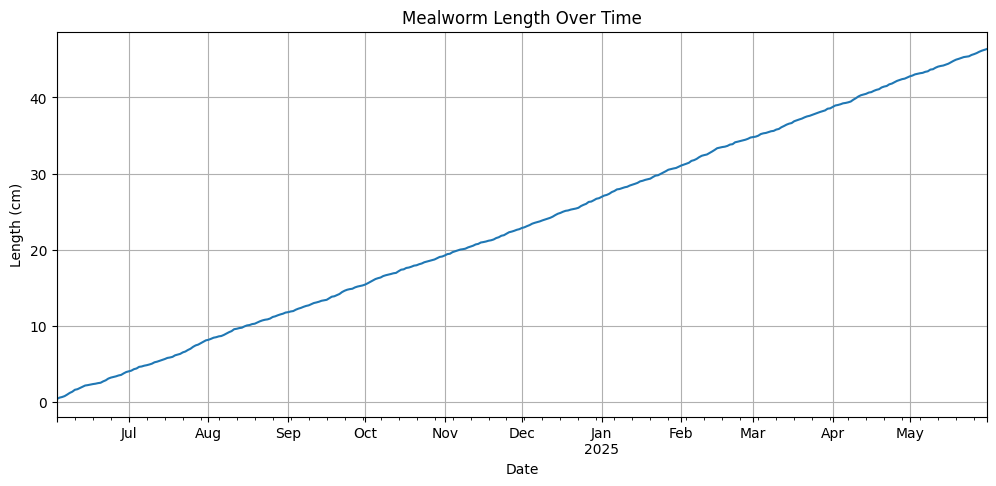

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("preprocessed_input.csv")

# Convert 'Date' column to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure it's sorted
df = df.sort_index()

# Visualize original data
df["Length_cm"].plot(title="Mealworm Length Over Time", figsize=(12, 5))
plt.ylabel("Length (cm)")
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["Length_cm"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 0.41194422694194777
p-value: 0.9819361587882731


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define and fit SARIMA model
# Order = (p,d,q), Seasonal Order = (P,D,Q,s)
model = SARIMAX(df["Length_cm"],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),  # assuming monthly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()

# Print summary
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Length_cm   No. Observations:                  363
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 490.889
Date:                            Thu, 12 Jun 2025   AIC                           -971.777
Time:                                    09:10:22   BIC                           -952.692
Sample:                                06-03-2024   HQIC                          -964.169
                                     - 05-31-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1709      3.620     -0.047      0.962      -7.265       6.923
ma.L1          0.1564      3.628   

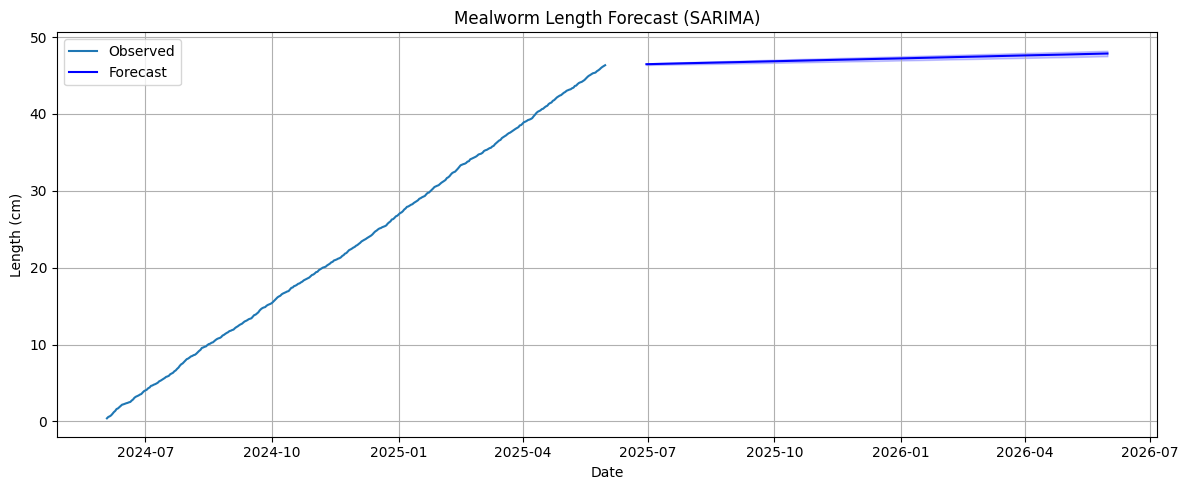

In [ ]:
# Forecast 12 future steps
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Length_cm"], label="Observed")
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq="M")[1:]
plt.plot(forecast_index, forecast_df["mean"], label="Forecast", color="blue")
plt.fill_between(forecast_index,
                 forecast_df["mean_ci_lower"],
                 forecast_df["mean_ci_upper"],
                 color="blue", alpha=0.2)

plt.title("Mealworm Length Forecast (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Length (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("preprocessed_input.csv")


In [ ]:
df['timestamp'] = pd.to_datetime(df['Date'], errors='coerce')


In [ ]:
print(df[['Date', 'timestamp']].head())
print(df.dtypes)


         Date  timestamp
0  2024-06-03 2024-06-03
1  2024-06-04 2024-06-04
2  2024-06-05 2024-06-05
3  2024-06-06 2024-06-06
4  2024-06-07 2024-06-07
Date                             object
Temperature_C                   float64
Humidity_%                      float64
CO2_ppm                         float64
GrowthRate_cm_per_day           float64
Length_cm                       float64
Weight_g                        float64
Ammonia_ppm                     float64
Temp_3day_avg                   float64
Humidity_3day_avg               float64
CO2_3day_avg                    float64
GrowthRate_calc                 float64
LengthRate_calc                 float64
Delta_Temperature               float64
Delta_Humidity                  float64
Delta_CO2                       float64
Delta_Ammonia                   float64
timestamp                datetime64[ns]
dtype: object


In [ ]:
!pip install salesforce-merlion


## **ARIMA**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('preprocessed_input.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (363, 16)


,Temperature_C,Humidity_%,CO2_ppm,GrowthRate_cm_per_day,Length_cm,Weight_g,Ammonia_ppm,Temp_3day_avg,Humidity_3day_avg,CO2_3day_avg,GrowthRate_calc,LengthRate_calc,Delta_Temperature,Delta_Humidity,Delta_CO2,Delta_Ammonia
Date,,,,,,,,,,,,,,,,
2024-06-03,0.547932,0.468999,0.594235,0.4845,0.4050,0.000022,0.500000,0.504073,0.457337,0.496990,0.000000,0.1469,0.110902,-0.036716,0.252995,0.088235
2024-06-04,0.671053,0.483893,0.209086,0.6530,0.5856,0.000065,0.367647,0.552005,0.486203,0.381520,0.000043,0.1806,0.123120,0.014894,-0.385149,-0.132353
2024-06-05,0.423872,0.332871,0.707474,0.1515,0.6659,0.000087,0.352941,0.547619,0.428588,0.503598,0.000022,0.0803,-0.247180,-0.151022,0.498388,-0.014706
2024-06-06,0.423872,0.471077,0.605972,0.3550,0.7869,0.000130,0.279412,0.506266,0.429281,0.507511,0.000043,0.1210,0.000000,0.138206,-0.101502,-0.073529
2024-06-07,0.679511,0.553169,0.566442,0.7470,0.9863,0.000216,0.673203,0.509085,0.452373,0.626629,0.000087,0.1994,0.255639,0.082092,-0.039530,0.393791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-27,0.530075,0.435054,0.506659,0.4200,45.8006,0.974741,0.232026,0.457393,0.509064,0.487685,0.006271,0.1340,0.189850,-0.061309,0.022745,-0.318627
2025-05-28,0.672932,0.470038,0.512923,0.6225,45.9751,0.982937,0.495098,0.514411,0.467152,0.501166,0.008196,0.1745,0.142857,0.034984,0.006264,0.263072
2025-05-29,0.441729,0.527191,0.652497,0.4525,46.1156,0.989555,0.792484,0.548246,0.477428,0.557360,0.006618,0.1405,-0.231203,0.057153,0.139573,0.297386


<Axes: xlabel='Date'>

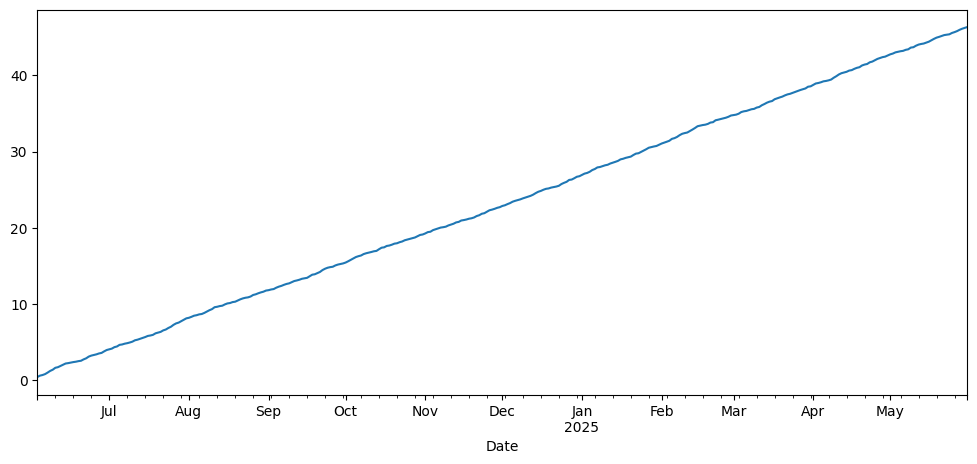

In [ ]:
df['Length_cm'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
ad_test(df['Length_cm'])

1. ADF :  0.41194422694194777
2. P-Value :  0.9819361587882731
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 358
5. Critical Values :
	 1% :  -3.448748905151901
	 5% :  -2.8696473721448728
	 10% :  -2.5710891239349585


In [ ]:
df["length_diff"] = df["Length_cm"].diff().dropna()


In [ ]:
ad_test(df["length_diff"].dropna())


1. ADF :  -10.457027161712958
2. P-Value :  1.390091498365769e-18
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 358
5. Critical Values :
	 1% :  -3.448748905151901
	 5% :  -2.8696473721448728
	 10% :  -2.5710891239349585


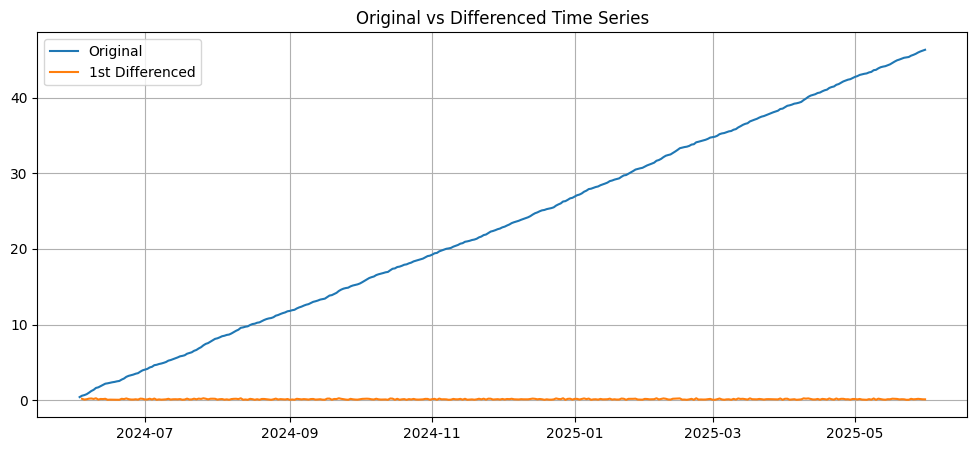

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df["Length_cm"], label="Original")
plt.plot(df["length_diff"], label="1st Differenced")
plt.legend()
plt.title("Original vs Differenced Time Series")
plt.grid(True)
plt.show()


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Length_cm'],
                          suppress_warnings=True)

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 550.814
Date:                Thu, 12 Jun 2025   AIC                          -1097.629
Time:                        10:52:18   BIC                          -1089.845
Sample:                    06-03-2024   HQIC                         -1094.534
                         - 05-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1269      0.003     42.832      0.000       0.121       0.133
sigma2         0.0028      0.000      9.774      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                18.40
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.38
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# 80/20 split based on total length
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Test starts at:\n", test.iloc[0])
print("Test ends at:\n", test.iloc[-1])


Train shape: (290, 1)
Test shape: (73, 1)
Test starts at:
 Length_cm    37.2068
Name: 2025-03-20 00:00:00, dtype: float64
Test ends at:
 Length_cm    46.3363
Name: 2025-05-31 00:00:00, dtype: float64


In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(363, 2)
(333, 2) (30, 2)
Length_cm      42.8522
length_diff     0.0986
Name: 2025-05-02 00:00:00, dtype: float64 Length_cm      46.3363
length_diff     0.1082
Name: 2025-05-31 00:00:00, dtype: float64


In [ ]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

df = pd.read_csv("preprocessed_input.csv", parse_dates=["Date"])
df = df[["Date", "Length_cm"]]
df.set_index("Date", inplace=True)

# Make sure data is stationary (you can difference manually or let auto_arima handle it)
series = df["Length_cm"]

# Run auto_arima
model = auto_arima(series,
                   start_p=0, max_p=3,
                   start_q=0, max_q=3,
                   d=None,           # Let it determine differencing automatically
                   seasonal=False,   # If your data is not seasonal
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Show summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1097.629, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1095.692, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1095.688, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-407.494, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1093.675, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.777 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 550.814
Date:                Thu, 12 Jun 2025   AIC                          -1097.629
Time:                        10:52:30   BIC                          -1089.845
Sample:                    06-03-2024   HQIC                         -1094.534
                         - 05-31-2025                                   

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Length_cm'],order=(0,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Length_cm   No. Observations:                  333
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 185.909
Date:                Thu, 12 Jun 2025   AIC                           -369.819
Time:                        10:52:35   BIC                           -366.014
Sample:                    06-03-2024   HQIC                          -368.301
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0191      0.003      7.131      0.000       0.014       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                17.43
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.38
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train model
model = ARIMA(train['Length_cm'], order=(0,1,0))
model_fit = model.fit()

# Predict
start = len(train)
end = start + len(test) - 1
pred = model_fit.predict(start=start, end=end)


In [ ]:
print(pred)

2025-01-01    26.7592
2025-01-02    26.7592
2025-01-03    26.7592
2025-01-04    26.7592
2025-01-05    26.7592
               ...   
2025-05-27    26.7592
2025-05-28    26.7592
2025-05-29    26.7592
2025-05-30    26.7592
2025-05-31    26.7592
Freq: D, Name: predicted_mean, Length: 151, dtype: float64


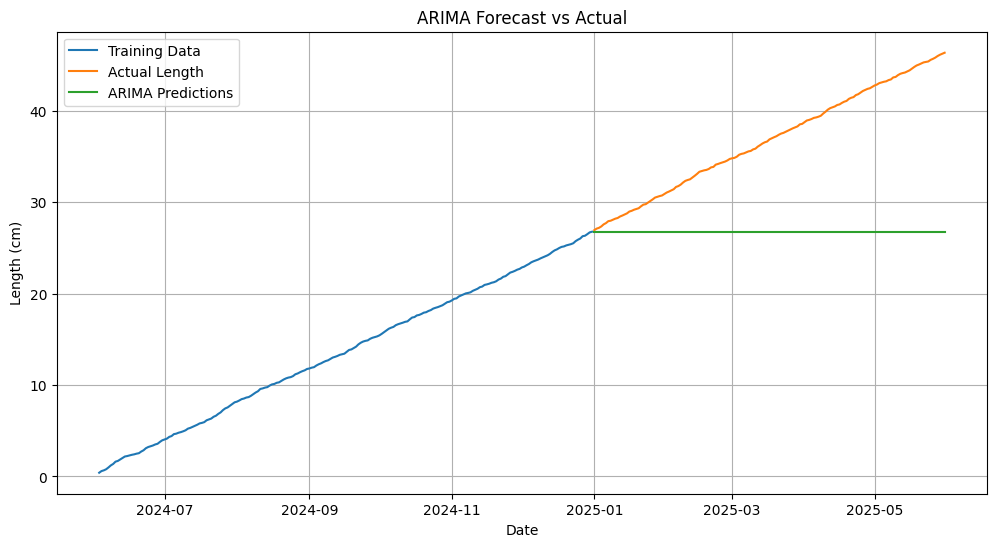

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your test data has a DateTime index
train = df[:'2024-12-31']
test = df['2025-01-01':]

# Fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Length_cm'], order=(0,1,0))  # replace (p,d,q) with best parameters
model_fit = model.fit()

# Define start and end for prediction
start = len(train)
end = len(train) + len(test) - 1

# Predict future values
pred = model_fit.predict(start=start, end=end, typ='levels')

# Option 1: If test index is datetime and aligns with prediction
pred.index = test.index  # this aligns predictions with actual test dates

# Plotting
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Length_cm'], label='Training Data')
plt.plot(test.index, test['Length_cm'], label='Actual Length')
plt.plot(pred.index, pred, label='ARIMA Predictions')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Length (cm)")
plt.grid(True)
plt.show()


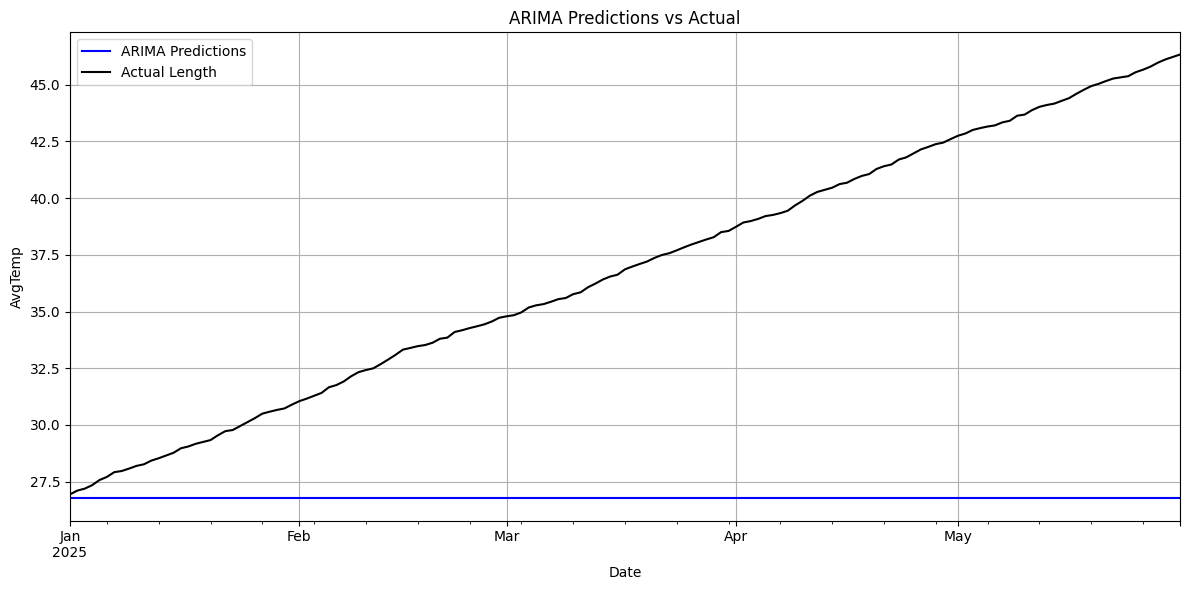

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot ARIMA predictions
pred.plot(label='ARIMA Predictions', color='blue')

# Plot actual average temperature (or replace with actual column)
test['Length_cm'].plot(label='Actual Length', color='black')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("AvgTemp")
plt.title("ARIMA Predictions vs Actual")

# Show legend and plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [ ]:
model = ARIMA(train, order=(0, 1, 0))  # Example parameters
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Length_cm   No. Observations:                  290
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 162.784
Date:                Thu, 12 Jun 2025   AIC                           -323.567
Time:                        11:09:46   BIC                           -319.901
Sample:                    06-03-2024   HQIC                          -322.098
                         - 03-19-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0190      0.003      6.695      0.000       0.013       0.025
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.35
Prob(Q):                              1.00   Pr

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

pred = model_fit.predict(start=start, end=end, typ='levels')
pred.index = test.index  # Align prediction dates with test set


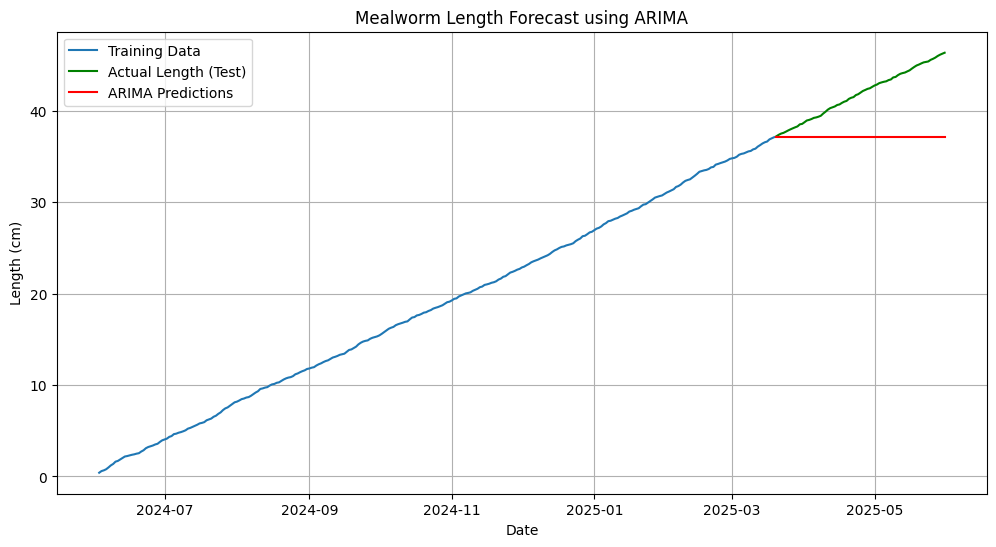

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Length_cm'], label='Training Data')
plt.plot(test.index, test['Length_cm'], label='Actual Length (Test)', color='green')
plt.plot(pred.index, pred, label='ARIMA Predictions', color='red')
plt.xlabel("Date")
plt.ylabel("Length (cm)")
plt.title("Mealworm Length Forecast using ARIMA")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test['Length_cm'].mean()

41.82825479452055

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Length_cm']))
print(rmse)

5.441733003826219


In [ ]:
model2=ARIMA(df['Length_cm'],order=(1,0,5))
model2=model2.fit()
df.tail()

,Length_cm
Date,
2025-05-27,45.8006
2025-05-28,45.9751
2025-05-29,46.1156
2025-05-30,46.2281
2025-05-31,46.3363


In [ ]:
# Generate future dates
index_future_dates = pd.date_range(start='2026-01-01', periods=366)

# Predict 366 values
pred = model2.predict(start=len(df), end=len(df) + 365, typ='levels').rename('ARIMA Predictions')

# Assign date index
pred.index = index_future_dates


In [ ]:
print(pred)

2026-01-01    46.402661
2026-01-02    46.454270
2026-01-03    46.480563
2026-01-04    46.490521
2026-01-05    46.501344
                ...    
2026-12-28    45.887549
2026-12-29    45.885853
2026-12-30    45.884156
2026-12-31    45.882460
2027-01-01    45.880764
Freq: D, Name: ARIMA Predictions, Length: 366, dtype: float64


<Axes: >

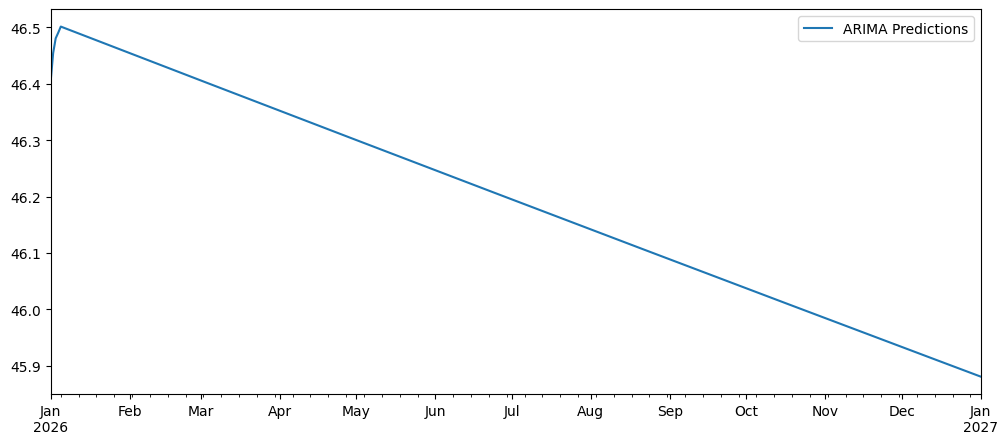

In [ ]:
pred.plot(figsize=(12,5),legend=True)

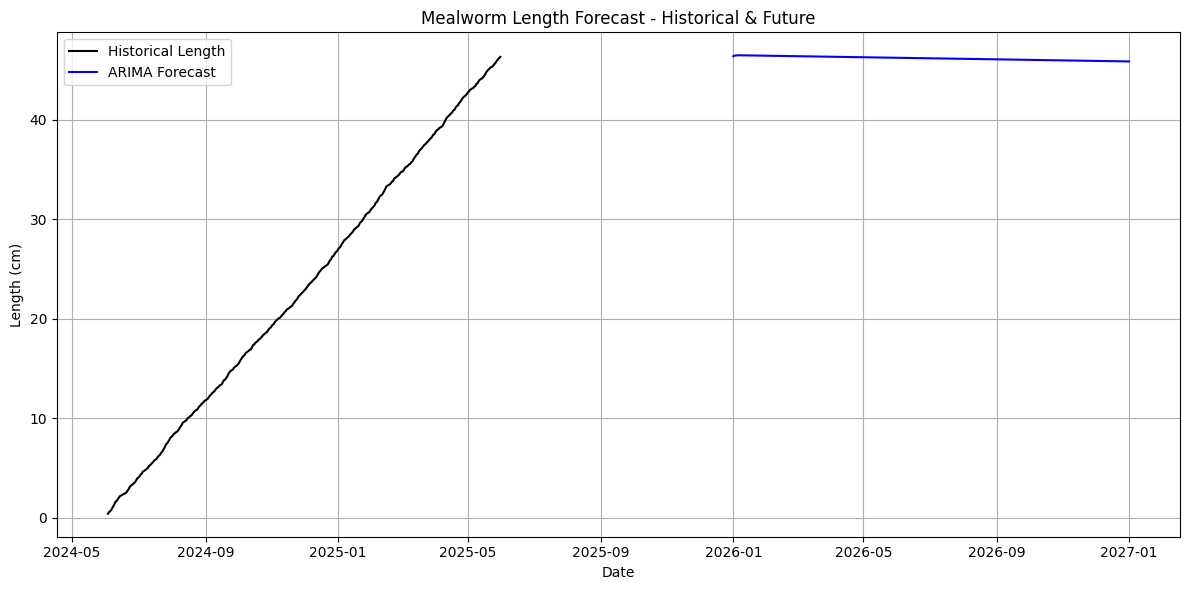

In [ ]:
import matplotlib.pyplot as plt

# 1. Plot Historical Data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Length_cm'], label='Historical Length', color='black')

# 2. Plot Future Forecast
plt.plot(pred.index, pred, label='ARIMA Forecast', color='blue')

# 3. Formatting the Plot
plt.xlabel("Date")
plt.ylabel("Length (cm)")
plt.title("Mealworm Length Forecast - Historical & Future")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 4. Show the Plot
plt.show()


## **Phropet Model**

In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
df = pd.read_csv('preprocessed_input.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   363 non-null    object 
 1   Temperature_C          363 non-null    float64
 2   Humidity_%             363 non-null    float64
 3   CO2_ppm                363 non-null    float64
 4   GrowthRate_cm_per_day  363 non-null    float64
 5   Length_cm              363 non-null    float64
 6   Weight_g               363 non-null    float64
 7   Ammonia_ppm            363 non-null    float64
 8   Temp_3day_avg          363 non-null    float64
 9   Humidity_3day_avg      363 non-null    float64
 10  CO2_3day_avg           363 non-null    float64
 11  GrowthRate_calc        363 non-null    float64
 12  LengthRate_calc        363 non-null    float64
 13  Delta_Temperature      363 non-null    float64
 14  Delta_Humidity         363 non-null    float64
 15  Delta_

In [ ]:
df.head()

,Date,Temperature_C,Humidity_%,CO2_ppm,GrowthRate_cm_per_day,Length_cm,Weight_g,Ammonia_ppm,Temp_3day_avg,Humidity_3day_avg,CO2_3day_avg,GrowthRate_calc,LengthRate_calc,Delta_Temperature,Delta_Humidity,Delta_CO2,Delta_Ammonia
0,2024-06-03,0.547932,0.468999,0.594235,0.4845,0.4050,0.000022,0.500000,0.504073,0.457337,0.496990,0.000000,0.1469,0.110902,-0.036716,0.252995,0.088235
1,2024-06-04,0.671053,0.483893,0.209086,0.6530,0.5856,0.000065,0.367647,0.552005,0.486203,0.381520,0.000043,0.1806,0.123120,0.014894,-0.385149,-0.132353
2,2024-06-05,0.423872,0.332871,0.707474,0.1515,0.6659,0.000087,0.352941,0.547619,0.428588,0.503598,0.000022,0.0803,-0.247180,-0.151022,0.498388,-0.014706
3,2024-06-06,0.423872,0.471077,0.605972,0.3550,0.7869,0.000130,0.279412,0.506266,0.429281,0.507511,0.000043,0.1210,0.000000,0.138206,-0.101502,-0.073529
4,2024-06-07,0.679511,0.553169,0.566442,0.7470,0.9863,0.000216,0.673203,0.509085,0.452373,0.626629,0.000087,0.1994,0.255639,0.082092,-0.039530,0.393791


In [ ]:
df=df[["Date","Length_cm"]]
df.head()

,Date,Length_cm
0,2024-06-03,0.4050
1,2024-06-04,0.5856
2,2024-06-05,0.6659
3,2024-06-06,0.7869
4,2024-06-07,0.9863


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
358,2025-05-27,45.8006
359,2025-05-28,45.9751
360,2025-05-29,46.1156
361,2025-05-30,46.2281
362,2025-05-31,46.3363


<Axes: xlabel='ds'>

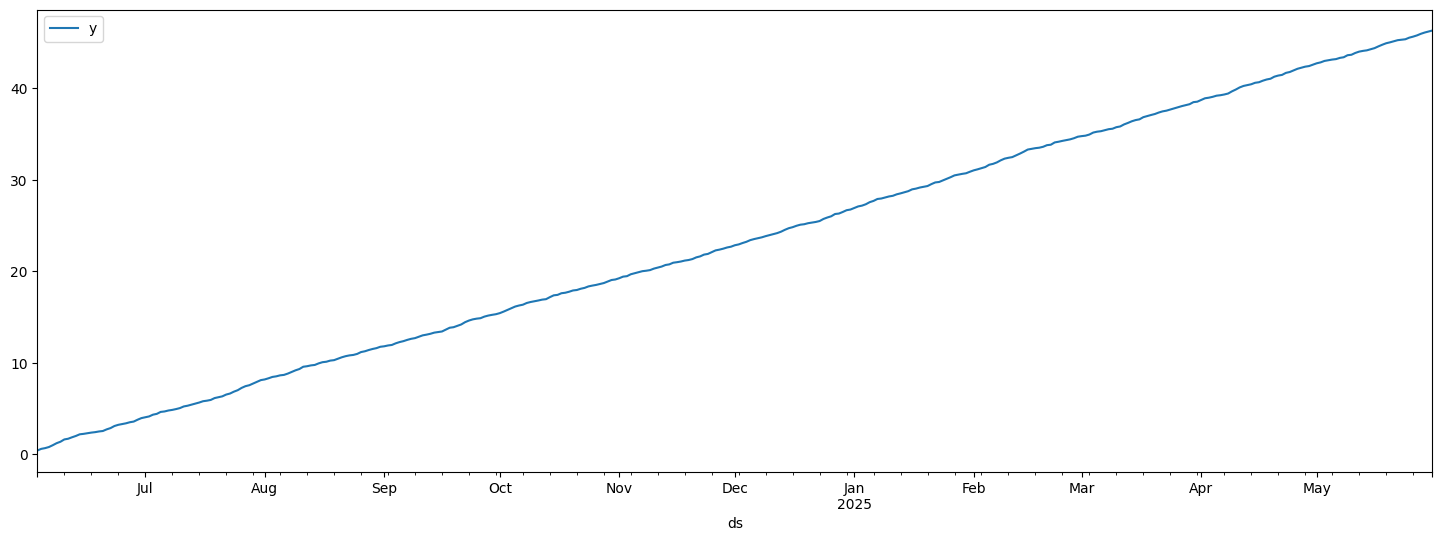

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp019w03o6/5fa4h_hj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp019w03o6/q878ll4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96710', 'data', 'file=/tmp/tmp019w03o6/5fa4h_hj.json', 'init=/tmp/tmp019w03o6/q878ll4r.json', 'output', 'file=/tmp/tmp019w03o6/prophet_model5uhf3pj3/prophet_model-20250612113607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
721,2026-05-25,92.487634,68.340314,118.375050,68.402181,118.349473,-0.003960,-0.003960,-0.003960,-0.003960,-0.003960,-0.003960,0.0,0.0,0.0,92.483675
722,2026-05-26,92.615890,68.510719,118.603615,68.435990,118.614333,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,-0.007905,0.0,0.0,0.0,92.607985
723,2026-05-27,92.744146,68.418829,118.900198,68.457744,118.872507,0.000219,0.000219,0.000219,0.000219,0.000219,0.000219,0.0,0.0,0.0,92.744365
724,2026-05-28,92.872401,68.541760,118.995185,68.479498,119.124767,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,-0.005185,0.0,0.0,0.0,92.867216
725,2026-05-29,93.000657,68.558800,119.374149,68.501252,119.377028,0.007516,0.007516,0.007516,0.007516,0.007516,0.007516,0.0,0.0,0.0,93.008173


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
721,2026-05-25,92.483675,68.340314,118.375050
722,2026-05-26,92.607985,68.510719,118.603615
723,2026-05-27,92.744365,68.418829,118.900198
724,2026-05-28,92.867216,68.541760,118.995185
725,2026-05-29,93.008173,68.558800,119.374149


In [ ]:
test.tail()

,ds,y
361,2025-05-30,46.2281
362,2025-05-31,46.3363


In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

## **LSTM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_input.csv')

In [3]:
print(df.columns)

Index(['Date', 'Temperature_C', 'Humidity_%', 'CO2_ppm',
       'GrowthRate_cm_per_day', 'Length_cm', 'Weight_g', 'Ammonia_ppm',
       'Temp_3day_avg', 'Humidity_3day_avg', 'CO2_3day_avg', 'GrowthRate_calc',
       'LengthRate_calc', 'Delta_Temperature', 'Delta_Humidity', 'Delta_CO2',
       'Delta_Ammonia'],
      dtype='object')


In [4]:
# Check and clean column names
df.columns = df.columns.str.strip()

# Confirm available columns
print(df.columns)

# Convert Date column to datetime and set it as index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
else:
    print("⚠️ 'Date' column not found. Please check the column names above.")


Index(['Date', 'Temperature_C', 'Humidity_%', 'CO2_ppm',
       'GrowthRate_cm_per_day', 'Length_cm', 'Weight_g', 'Ammonia_ppm',
       'Temp_3day_avg', 'Humidity_3day_avg', 'CO2_3day_avg', 'GrowthRate_calc',
       'LengthRate_calc', 'Delta_Temperature', 'Delta_Humidity', 'Delta_CO2',
       'Delta_Ammonia'],
      dtype='object')


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [6]:
df = pd.read_csv("preprocessed_input.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

In [7]:
df_single = df[['Length_cm']]

In [8]:
train = df_single.iloc[:-30]
test = df_single.iloc[-30:]

In [9]:
# Scale the data
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [10]:
# Set LSTM input parameters
n_input = 10  # number of time steps
n_features = 1  # because we are using only one feature

In [11]:
# Create Timeseries Generator
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                 length=n_input, batch_size=1)

In [12]:
# Build the model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Fit the model
model.fit(generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


323/323 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0421
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2308e-04
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.4324e-05
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3071e-05
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.6902e-06
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0039e-05
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.5720e-05
Epoch 8/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.0164e-05
Epoch 9/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.8677e-04
Epoch 10/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.5041e-05
Epoch 11/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.8038e-05
Epoch 12/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.7842e-05
Epoch 13/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.6456e-05
Epoch 14/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 9.5928e-05
Epoch 15/50
323

In [14]:
# ---- Predict using the trained model ---- #
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)

    # update batch to include current prediction
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━

In [15]:
# Inverse transform predictions
true_predictions = scaler.inverse_transform(test_predictions)

In [16]:
# Reindex predictions to match test set dates
pred_index = test.index
pred_series = pd.Series(true_predictions.flatten(), index=pred_index)

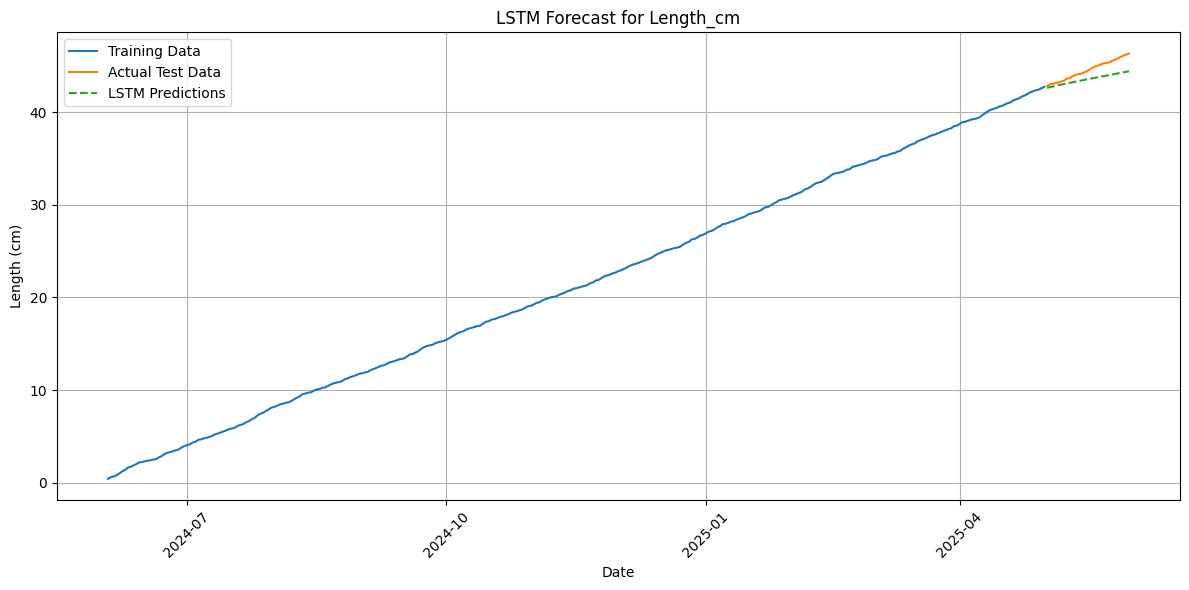

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Length_cm'], label='Training Data')
plt.plot(test.index, test['Length_cm'], label='Actual Test Data')
plt.plot(pred_series.index, pred_series, label='LSTM Predictions', linestyle='--')

# Format x-axis to show dates every 3 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend()
plt.title("LSTM Forecast for Length_cm")
plt.xlabel("Date")
plt.ylabel("Length (cm)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Prediction for Next One Year**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [19]:
df = pd.read_csv("preprocessed_input.csv")

In [20]:
# 2. Convert date column and sort
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

In [21]:
# 3. Select target feature
data = df[['Length_cm']]
data.set_index(df['Date'], inplace=True)

In [22]:
# 4. Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [23]:
# 5. Create time series generator
n_input = 30  # use last 30 days to predict next day
n_features = 1

X = []
y = []
for i in range(n_input, len(scaled_data)):
    X.append(scaled_data[i - n_input:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

In [24]:
# 6. Build the model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# 7. Train the model
model.fit(X, y, epochs=30, batch_size=16)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2794
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0150
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3041e-04
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7363e-04
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8411e-04
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2782e-04
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6983e-05
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6836e-05
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1033e-05
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.0999e-06
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4442e-05
Epoch 13/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1389e-05
Epoch 14/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1495e-06
Epoch 15/30
21/21 ━━━━━━━━━

In [26]:
# 8. Forecast next 365 days
future_predictions = []
current_batch = scaled_data[-n_input:].reshape((1, n_input, n_features))

for _ in range(365):
    pred = model.predict(current_batch)[0]
    future_predictions.append(pred)

    # Update batch
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

In [27]:
# 9. Inverse transform predictions
future_predictions = scaler.inverse_transform(future_predictions)

In [28]:
# 10. Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365)

In [29]:
# 11. Create forecast dataframe
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Length_cm': future_predictions.flatten()})

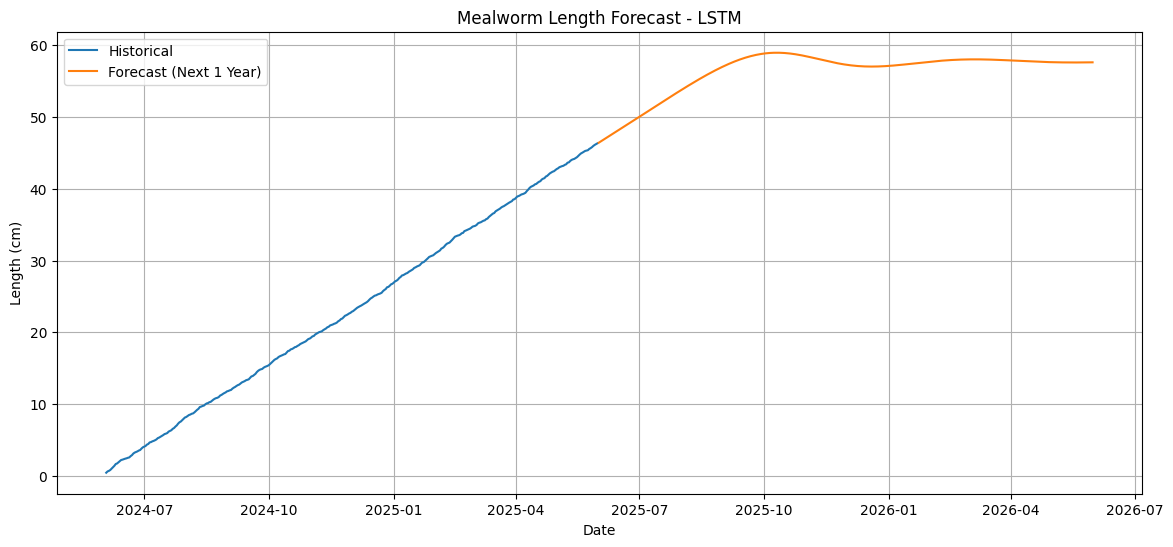

In [30]:
# 12. Plot results
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Length_cm'], label='Historical')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Length_cm'], label='Forecast (Next 1 Year)')
plt.xlabel("Date")
plt.ylabel("Length (cm)")
plt.title("Mealworm Length Forecast - LSTM")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(df.index)
print(df.index.dtype)


DatetimeIndex(['2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06',
               '2024-06-07', '2024-06-08', '2024-06-09', '2024-06-10',
               '2024-06-11', '2024-06-12',
               ...
               '2025-05-22', '2025-05-23', '2025-05-24', '2025-05-25',
               '2025-05-26', '2025-05-27', '2025-05-28', '2025-05-29',
               '2025-05-30', '2025-05-31'],
              dtype='datetime64[ns]', name='Date', length=363, freq=None)
datetime64[ns]
